In [175]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#####Lazim olabilir ileride

# pandas data_framde last columna göre sırala
##train_data1 = train_data.sort_values(train_data[train_data.columns[-1]])

#Sort by last column (for Classes) (Numpy Array)
##train_data = train_data[train_data[:,-1].argsort()] 
##test_data = test_data[test_data[:,-1].argsort()] 

In [176]:
# import data as pandas data frame
train_data = pd.read_csv("/home/ooa/Belgeler/Machine Learning/HW2/Data/optdigits.tra", header=None)
test_data = pd.read_csv("/home/ooa/Belgeler/Machine Learning/HW2/Data/optdigits.tes", header=None)

# convert pandas data frame to ndarray
train_data = train_data.values 
test_data = test_data.values


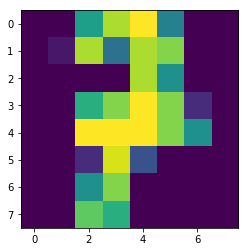

In [177]:
# random test to print the digit 7 from the data for data visualization
deneme_7 = train_data[30, :64]
deneme_7 = np.reshape(deneme_7, (8,8))
plt.imshow(deneme_7, interpolation='Nearest')
plt.show()

In [131]:
# knn = KNeighborsClassifier()
# knn.fit(train_data[:,:64], train_data[:,64]) 
# KNeighborsClassifier(metric='euclidean',n_neighbors=5, weights='uniform')
# print("Predictions from the classifier:")
# print(knn.predict(test_data[:,:64]))
# print("Target values:")
# print(test_data[:,64])

Predictions from the classifier:
[0 1 1 ... 1 9 8]
Target values:
[0 1 2 ... 8 9 8]


In [132]:
#accuracy = knn.score(test_data[:,:64], test_data[:,64])

0.9788536449638287

In [178]:
# Euclidean Distance 
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [189]:
# Neighbours
def neighbours(train, test, label, k):
    distance_matrix = []
    for i in range(len(train)):
        distance = dist(test, train[i])
        distance_matrix.append((distance, label[i]))
    distance_matrix.sort(key=lambda x: x[0])
    neighbors = distance_matrix[:k]
    return neighbors

In [277]:
correct = 0
for j in range(len(test_data)):
    k1 = 1
    neighbors = neighbours(train_data, test_data[j], train_data[:,64], k1)
    neighborss = np.array(neighbors)
    (values,counts) = np.unique(neighborss,return_counts=True)
    ind=np.argmax(counts)
    final_label = (values[ind])
    
    if float(test_data[:,64][j]) == final_label:
        correct += 1
    
    #print('loop number =', j,', test data label =', test_data[:,64][j], ', knn, distance + labels =', neighbors, ', label according to knn =', final_label, ', prob = ', prob)

In [278]:
accuracy = correct/len(test_data)*100

In [279]:
print(accuracy)

98.44184752365052


In [271]:
print(correct)

4


In [267]:
float(test_data[:,64][5])

5.0